# Binance Trading Volume Time Series Analysis
***


## Overview
***
Cryptocurrency trading volume is an essential indicator of market activity, showing the total amount of an asset traded over a given period. In this project, we use traditional time series analysis and forecasting techniques to predict Binance trading volume.

### Why Binance?
Binance is one of the largest and most influential cryptocurrency exchanges globally, providing a platform for trading a wide range of digital assets.It has expanded its ecosystem to include services such as Binance Smart Chain (BSC), DeFi projects, NFT marketplaces, and staking opportunities.

Binance is chosen for this project because:

- It is one of the most actively traded cryptocurrency exchanges

- It plays a crucial role in the global crypto market and DeFi applications

- Analyzing trading volume can provide insights into market trends, liquidity, and potential price movements

## Business Objective
***
This project is designed for cryptocurrency traders and stakeholders interested in Binance market trends. We aim to provide insights and forecasting models that help traders make informed decisions. Our focus includes:

- Analyzing historical Binance trading volume to identify trends and seasonality.

- Building and evaluating time series forecasting models to predict future trading volumes.

- Providing actionable insights on how trading volume changes may influence Binance’s price movements and market dynamics.

By understanding and forecasting Binance’s trading volume, we aim to help traders optimize their strategies, manage risk, and identify potential trading opportunities in the cryptocurrency market.

## Dataset
***
The dataset used in this analysis contains historical trading data for cryptocurrency pairs on Binance taken from [Cryptodata](https://www.cryptodatadownload.com/data/) website. It includes price and volume information at a daily frequency for different trading pairs. The dataset can be used for time series analysis, forecasting, and anomaly detection in crypto trading.

You can download the dataset from the following link:

📥 Download [Binance_2022.csv](https://drive.google.com/file/d/1Wc7XoxPClzv_ojNLdLhuqH5vu78Xua8P/view?usp=sharing)

## Methodology
***
We employ time series analysis and predictive modeling for forecasting.

📥 Download the full report here: [TSA-Report](https://drive.google.com/file/d/1PnYJkwM7ZT9vHm8_a2Un9Rb20r_4Qys4/view?usp=sharing)

## Library Imports
In this section, we install and load the necessary R libraries for data manipulation, visualization, and time series analysis.
***

In [ ]:
# Install missing packages
install.packages(c("data.table", "ggplot2", "lubridate", "dplyr",
                   "tseries", "readr", "forecast", "MASS", "zoo"))

# Load libraries
library(data.table)
library(ggplot2)
library(lubridate)
library(forecast)
library(dplyr)
library(tseries)
library(MASS)
library(zoo)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Data Loading and Pre-processing

***


In [ ]:
#Load the data
data <- fread(file = "Binance_2022.csv")

In [ ]:
# Convert the date column to Date format
data$Date <- as.Date(data$Date)

# Check for missing values and handle them if present
if(sum(is.na(data$tradecount)) > 0) {
  data$tradecount <- na.approx(data$tradecount, na.rm = FALSE)
}

# Get the number of rows and columns
cat("Dataset Dimensions:", dim(data)[1], "rows and", dim(data)[2], "columns\n")

# Preview data
head(data)

Dataset Dimensions: 424 rows and 10 columns


Unix,Date,Symbol,Open,High,Low,Close,Volume 1INCH,Volume BTC,tradecount
<int64>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1677542400000,2023-02-28,1INCHBTC,2.464e-05,2.494e-05,2.434e-05,2.465e-05,180356.4,4.440214,1507
1677456000000,2023-02-27,1INCHBTC,2.476e-05,2.504e-05,2.420e-05,2.464e-05,462133.3,11.362081,3048
1677369600000,2023-02-26,1INCHBTC,2.510e-05,2.577e-05,2.433e-05,2.473e-05,313277.2,7.836953,3119
1677283200000,2023-02-25,1INCHBTC,2.590e-05,2.595e-05,2.473e-05,2.511e-05,254662.1,6.481182,2253
1677196800000,2023-02-24,1INCHBTC,2.587e-05,2.610e-05,2.537e-05,2.592e-05,323018.3,8.329825,2955
1677110400000,2023-02-23,1INCHBTC,2.656e-05,2.671e-05,2.548e-05,2.588e-05,415584.5,10.827373,3847


## Filtering the Data for Training and Testing

To analyze trends over time, we split the dataset into two subsets:
- `train_data`: Covers transactions from January 1, 2022, to January 1, 2023.
- `test_data`: Covers transactions from January 1, 2023, to February 1, 2023.

This allows us to train models on past data and evaluate their performance on recent data.


In [ ]:
# Filter data for 2022-2023
train_data <- data %>%
  filter(Date >= "2022-01-01" & Date < "2023-01-01") %>%
  arrange(Date)

test_data <- data %>%
  filter(Date >= "2023-01-01" & Date < "2023-02-01") %>%
  arrange(Date)

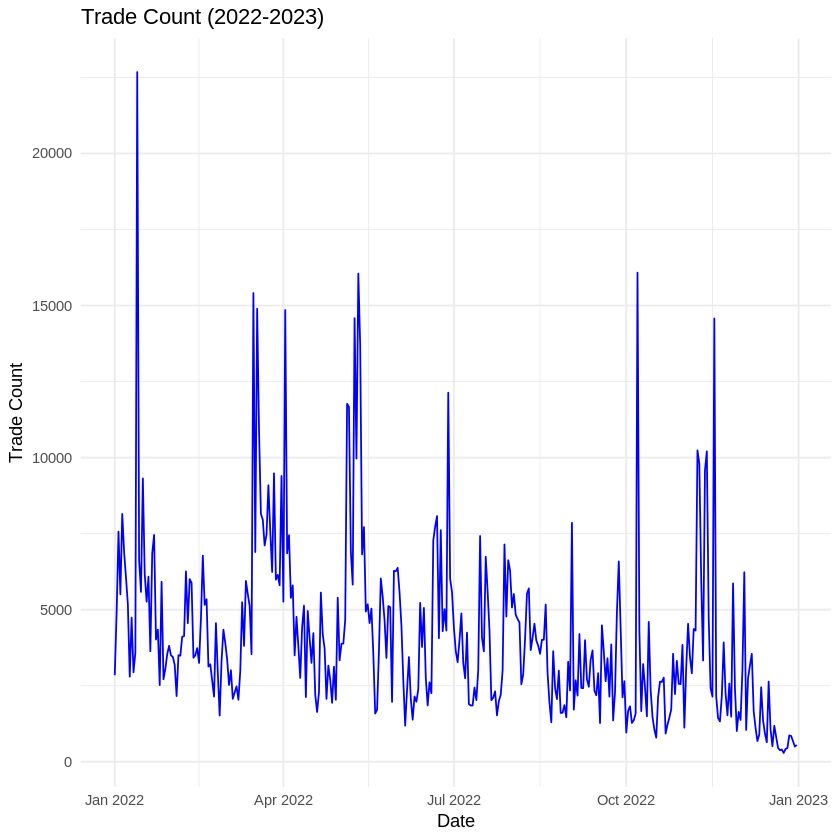

In [ ]:
# Plot the original series
ggplot(train_data, aes(x = Date, y = tradecount)) +
  geom_line(color = "blue") +
  labs(title = "Trade Count (2022-2023)", x = "Date", y = "Trade Count") +
  theme_minimal()

The plot above shows the daily trade count from January 2022 to January 2023.

### **Observations:**
- The trade count is highly volatile, with significant spikes at certain periods which indicates potential change in variance over time.
- There appears to be a downward trend towards the end of the observed period.
- The data exhibits irregular fluctuations, suggesting external factors influencing trading activity.
- Some peaks indicate high trading activity on specific dates, which may require further investigation into external events.
- Thus the series does not appear stationary due to noticeable trends and varying fluctuations.

To better understand the characteristics of this time series, we will compute key statistical metrics and decompose the data into its trend, seasonality, and residual components.

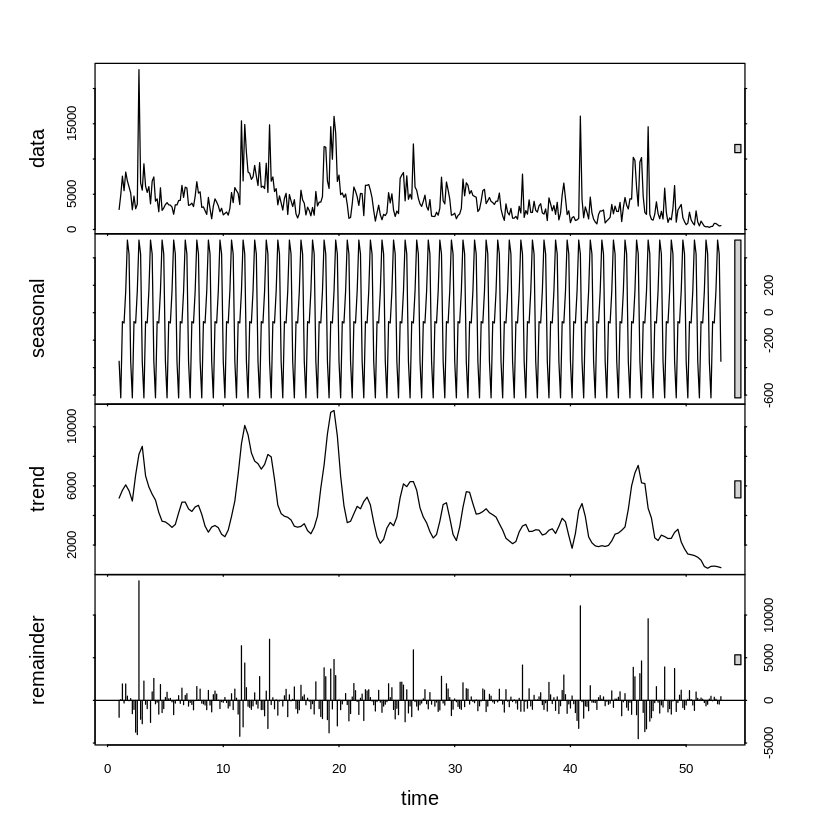

In [ ]:
# Trend, seasonality and residuals decomposition
ts_data <- ts(train_data$tradecount, frequency = 7)
decomp <- stl(ts_data, s.window = "periodic")

plot(decomp)


### Observations:
- **Seasonal Component:** A strong weekly seasonality pattern is present, indicating a repeating cycle every 7 days.
- **Trend Component:** The overall trend appears to be decreasing in late 2022, with periods of rising and falling trade activity.
- **Residuals:** The residuals show irregular fluctuations, meaning there are external factors influencing trade counts beyond trend and seasonality.


# Phase 0: Exploratory Data Analysis (EDA)
***
### 1. Data Visualization:
The initial visualization presents the testing dataset (2023+) with trade count values plotted over time

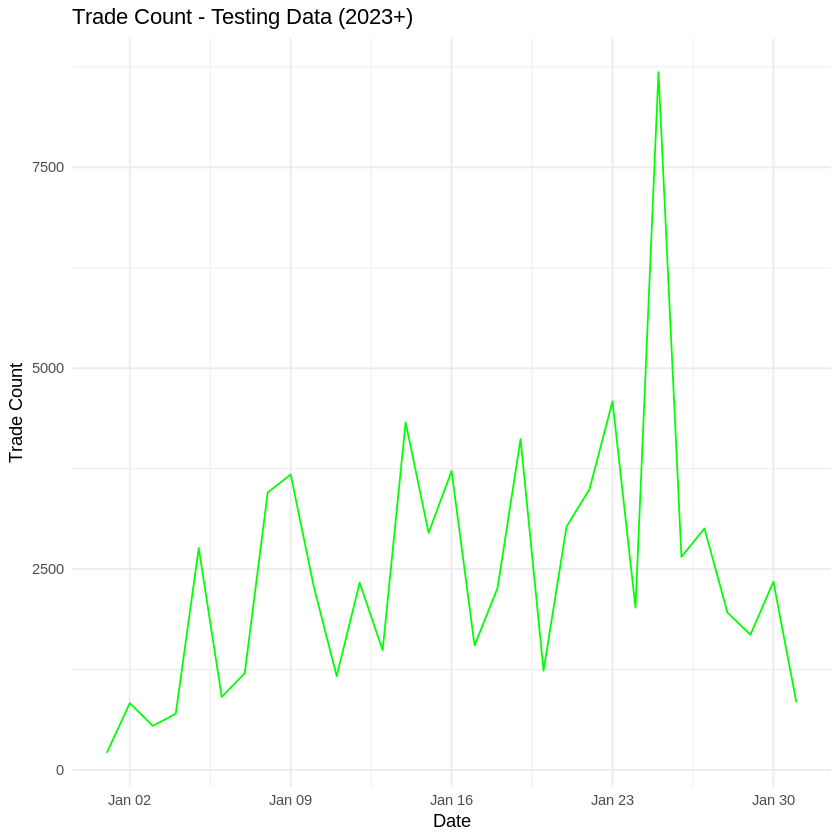

In [ ]:
#testing dataset plot
p2 <- ggplot(test_data, aes(x = Date, y = tradecount)) +
  geom_line(color = "green") +
  labs(title = "Trade Count - Testing Data (2023+)", x = "Date", y = "Trade Count") +
  theme_minimal()
print(p2)



The next visualization merges both training (2022, in turquoise) and testing (2023+, in coral) datasets to provide a comprehensive view of all available trade data

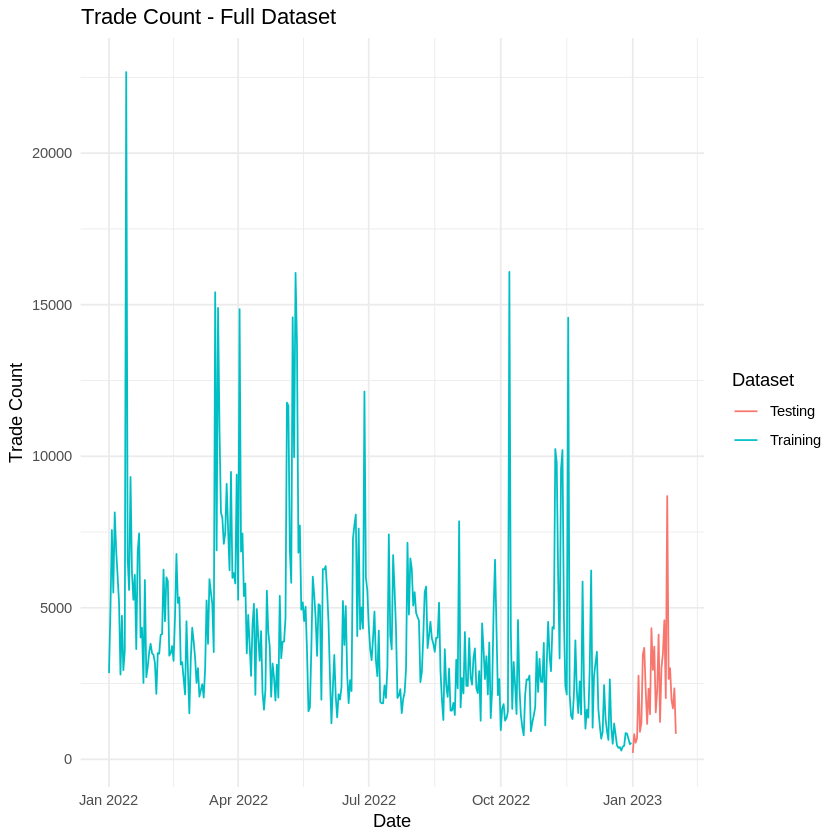

In [ ]:
# Combined plot
combined_data <- rbind(
  data.frame(train_data, Dataset = "Training"),
  data.frame(test_data, Dataset = "Testing")
)

p3 <- ggplot(combined_data, aes(x = Date, y = tradecount, color = Dataset)) +
  geom_line() +
  labs(title = "Trade Count - Full Dataset", x = "Date", y = "Trade Count") +
  theme_minimal()

print(p3)

###2. Data Distribution:

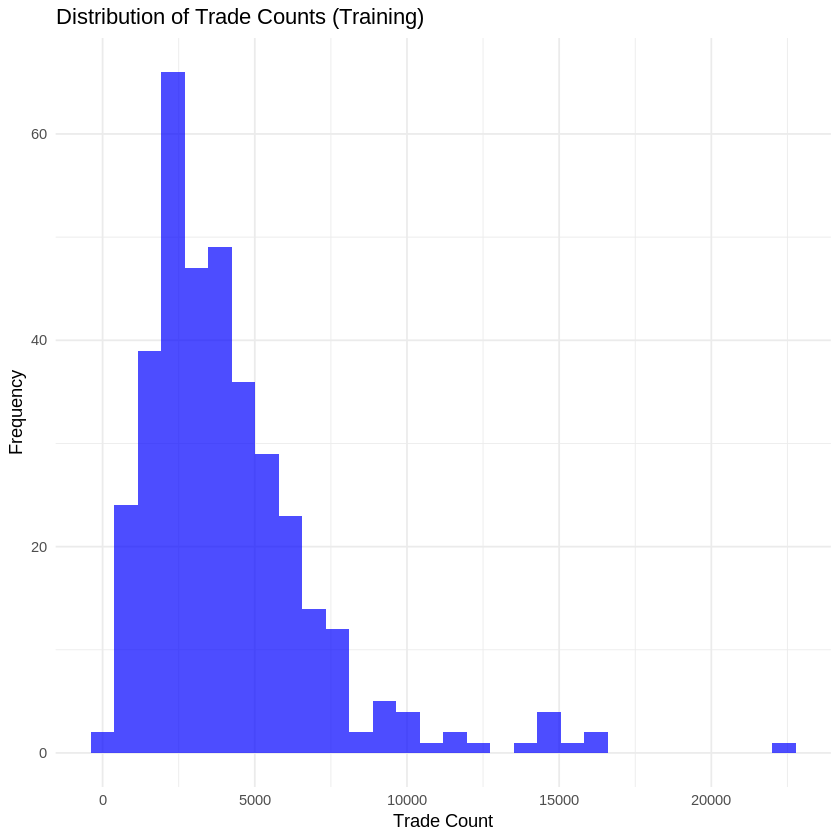

In [ ]:
# Plot distribution of trade counts
p4 <- ggplot(train_data, aes(x = tradecount)) +
  geom_histogram(bins = 30, fill = "blue", alpha = 0.7) +
  labs(title = "Distribution of Trade Counts (Training)", x = "Trade Count", y = "Frequency") +
  theme_minimal()
print(p4)

This histogram shows the frequency distribution of trade counts in the training dataset:
- The long tail to the right indicates infrequent but significant high-volume trading events
- This distribution suggests that modeling approaches should account for this non-normal pattern
- The skewed nature might require transformation before certain modeling techniques


### 3. Pattern Analysis:

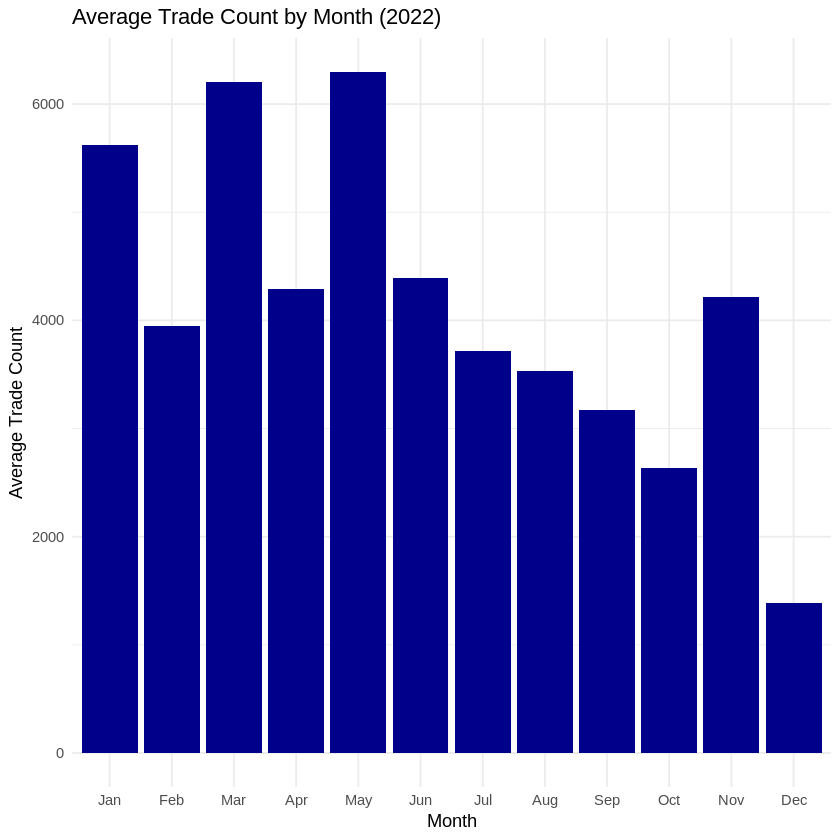

In [ ]:
# Monthly averages
train_data$month <- month(train_data$Date, label = TRUE)
monthly_avg <- train_data %>%
  group_by(month) %>%
  summarize(avg_trades = mean(tradecount, na.rm = TRUE))

p5 <- ggplot(monthly_avg, aes(x = month, y = avg_trades)) +
  geom_bar(stat = "identity", fill = "darkblue") +
  labs(title = "Average Trade Count by Month (2022)", x = "Month", y = "Average Trade Count") +
  theme_minimal()

print(p5)

This bar chart reveals the monthly average trade counts for 2022, providing insights into seasonal patterns:

- March has the highest average trading activity, followed closely by January
- A clear decline in average trade counts occurs from April through November
- This monthly pattern might suggest seasonal business cycles, fiscal year impacts, or regular market fluctuations
- These patterns does not show any clear monthly seasonal effects

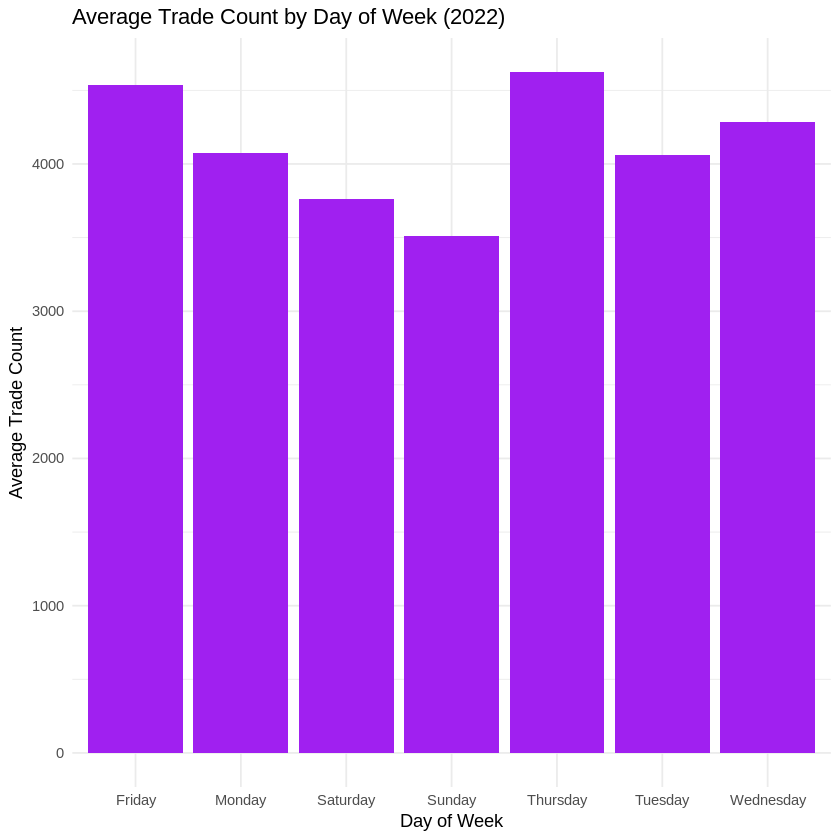

In [ ]:
# Day of week analysis
train_data$dow <- factor(weekdays(train_data$Date))
dow_avg <- train_data %>%
  group_by(dow) %>%
  summarize(avg_trades = mean(tradecount, na.rm = TRUE))

p6 <- ggplot(dow_avg, aes(x = dow, y = avg_trades)) +
  geom_bar(stat = "identity", fill = "purple") +
  labs(title = "Average Trade Count by Day of Week (2022)", x = "Day of Week", y = "Average Trade Count") +
  theme_minimal()

print(p6)


This visualization examines how trading activity varies by day of the week:

- Thursday shows the highest average trading activity, followed by Monday
- Wednesday has the lowest average trade count
- This weekly cyclical pattern provides valuable information for short-term forecasting

***
### 4. Feature Engineering:
From observations, we recognize that various factors may influence our time series, particularly in trading data. Feature engineering enables us to extract valuable calendar-based patterns that enhance predictive modeling.

- Day of the Week: Encoded as dummy variables to allow models to differentiate between trading days effectively.

- Weekend Indicators: Capture the impact of weekends on trading activity, as markets often exhibit different behaviors on these days.

- Month Factors: Help the model learn recurring monthly seasonality, which is crucial for forecasting.

These calendar-based features serve as external regressors in our models, integrating domain knowledge into the forecasting process. Ultimately, this approach enhances forecast accuracy by embedding contextual insights into the prediction framework.

In [ ]:
# Add calendar features as external regressors
# Create day of week feature
train_data$dow <- factor(weekdays(train_data$Date))
train_data$is_weekend <- ifelse(train_data$dow %in% c("Saturday", "Sunday"), 1, 0)

# Create month feature
train_data$month <- factor(month(train_data$Date))

# Create month start/end indicators
train_data$month_start <- ifelse(day(train_data$Date) <= 3, 1, 0)
train_data$month_end <- ifelse(day(train_data$Date) >= 28, 1, 0)

# Create dummy variables for day of week
dow_dummies <- model.matrix(~ dow - 1, data = train_data)
colnames(dow_dummies) <- paste0("dow_", colnames(dow_dummies))


## Phase 1: Data Preparation
***
### 1. Autocorrelation analysis of original series:

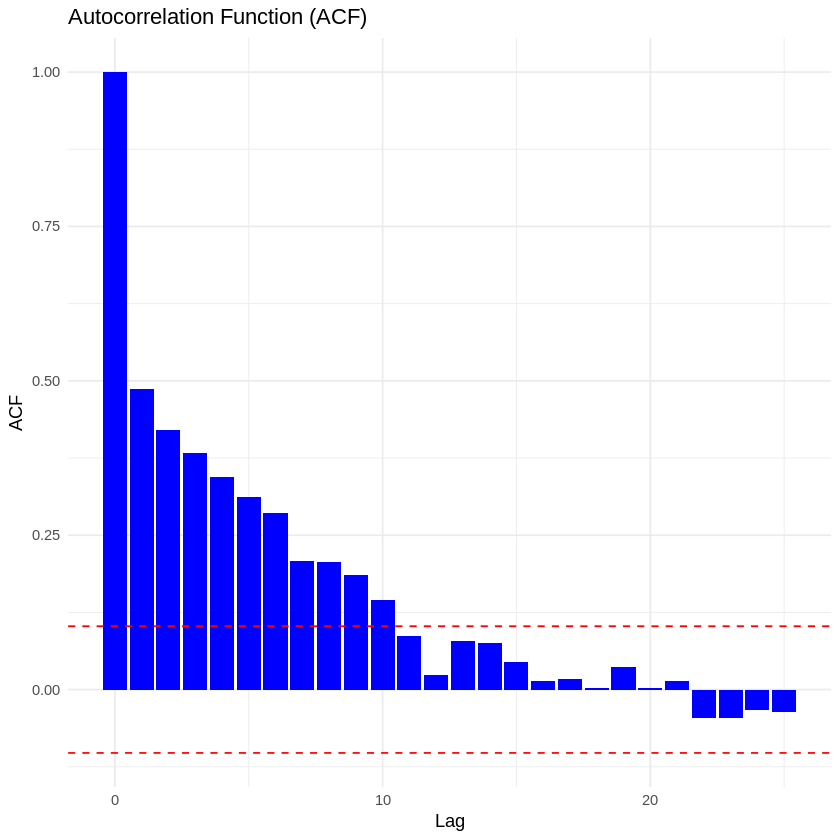

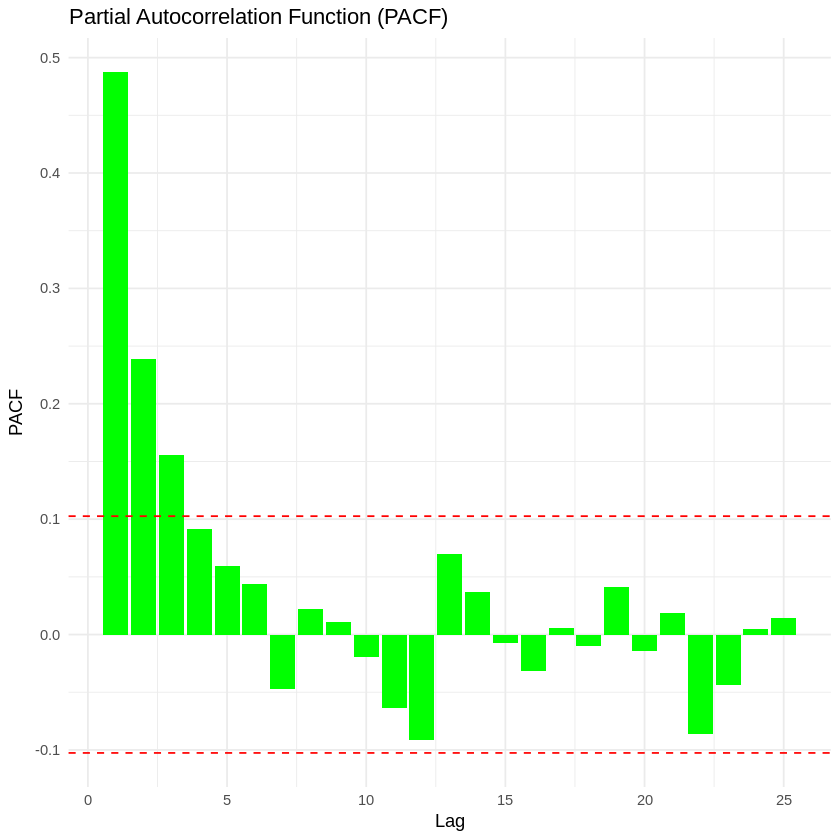

In [ ]:
# Autocorrelation and partial autocorrelation plots
acf_plot <- acf(train_data$tradecount, plot = FALSE)
pacf_plot <- pacf(train_data$tradecount, plot = FALSE)

p7 <- ggplot(data.frame(lag = acf_plot$lag, acf = acf_plot$acf), aes(x = lag, y = acf)) +
  geom_bar(stat = "identity", fill = "blue") +
  geom_hline(yintercept = c(qnorm(0.975)/sqrt(nrow(train_data)), -qnorm(0.975)/sqrt(nrow(train_data))),
             linetype = "dashed", color = "red") +
  labs(title = "Autocorrelation Function (ACF)", x = "Lag", y = "ACF") +
  theme_minimal()

p8 <- ggplot(data.frame(lag = pacf_plot$lag, pacf = pacf_plot$acf), aes(x = lag, y = pacf)) +
  geom_bar(stat = "identity", fill = "green") +
  geom_hline(yintercept = c(qnorm(0.975)/sqrt(nrow(train_data)), -qnorm(0.975)/sqrt(nrow(train_data))),
             linetype = "dashed", color = "red") +
  labs(title = "Partial Autocorrelation Function (PACF)", x = "Lag", y = "PACF") +
  theme_minimal()


print(p7)
print(p8)



### Observations:
- Strong autocorrelation at initial lags indicates high persistence in trade counts
- The gradually declining pattern suggests non-stationarity

### 2. Series transformation:
The Box-Cox transformation is applied to stabilize variance and normalize the data. This transformation helps address the right-skewed distribution observed in the histogram.
- This step is crucial before applying traditional time series models which assume constant variance

In [ ]:
# 1.Test different lambda values for Box-Cox
lambda_grid <- seq(0, 1, by = 0.1)
optimal_lambda <- BoxCox.lambda(train_data$tradecount)
cat("Optimal Box-Cox lambda from MASS package:", optimal_lambda, "\n")

# 2.Apply the optimal Box-Cox transformation
train_data$bc_tradecount <- BoxCox(train_data$tradecount, optimal_lambda)


Optimal Box-Cox lambda from MASS package: -0.1719411 


***
### 3. Differencing:
 In the next step, differencing is used to eliminate trends, making the series more stationary and reduce autocorrelation, which improves forecasting accuracy, making the data more stationary and suitable for modeling. Here, we applied the first difference to the Box-Cox transformed trade count data:

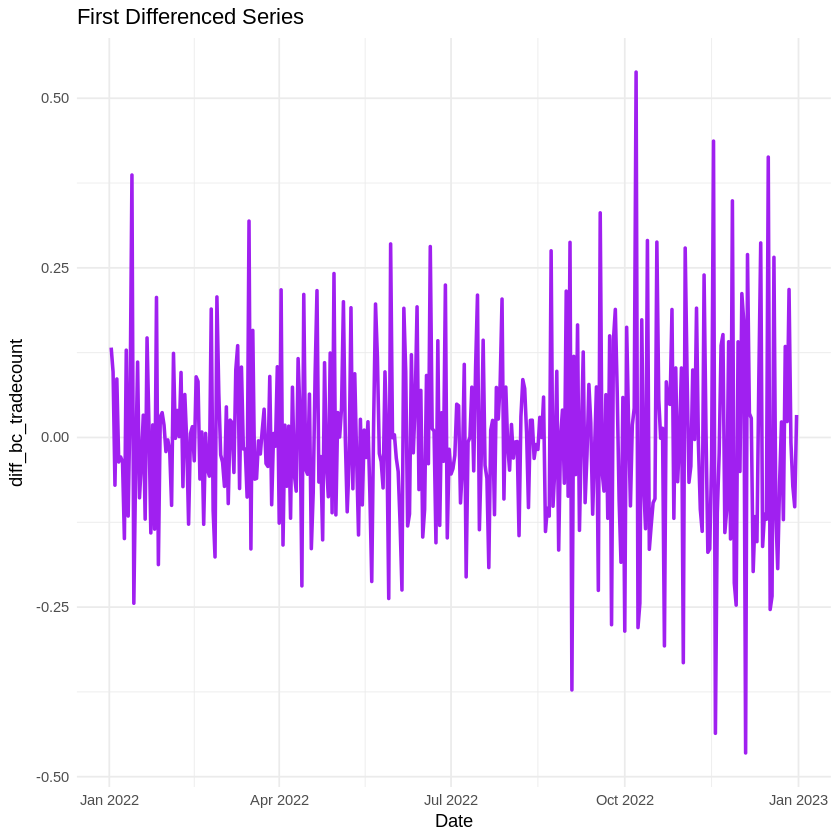

In [ ]:
# First difference of the transformed data
train_data$diff_bc_tradecount <- c(NA, diff(train_data$bc_tradecount, differences = 1))
train_data <- train_data[!is.na(train_data$diff_bc_tradecount),]

# Plot Differenced Series
ggplot(train_data, aes(x = Date, y = diff_bc_tradecount)) +
  geom_line(color = "purple", size = 1) +
  ggtitle("First Differenced Series") +
  theme_minimal()


The plot of the first differenced series shows:

- Fluctuations around zero, indicating the removal of trend components.

- Sudden spikes and dips, which could be potential outliers or periods of higher volatility in the data.

Next, we will look at the ACF and PACF plots of the differenced time series. This is a crucial step  to determine stationarity- to ensure that no further differencing is needed , and identify potential model parameters.

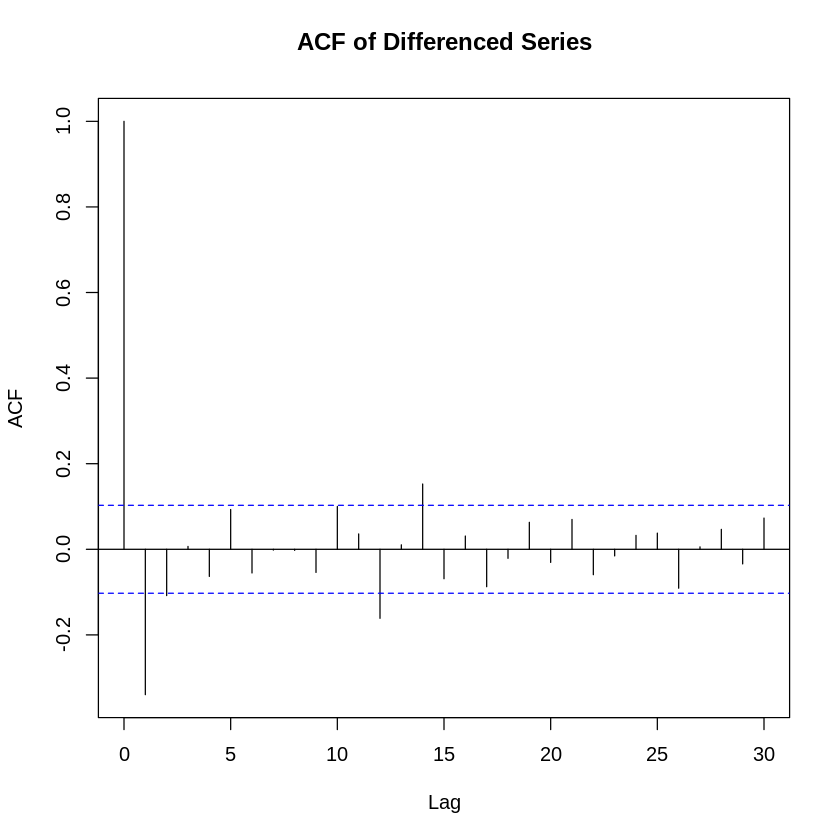

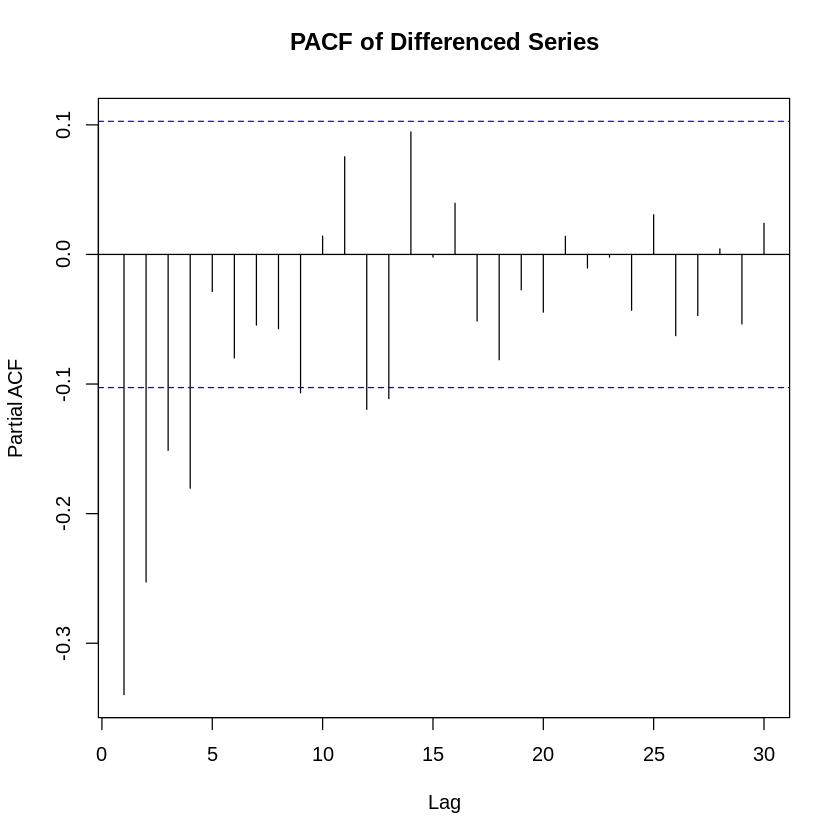

In [ ]:
# Plot ACF and PACF of the Differenced Series
acf(train_data$diff_bc_tradecount, main = "ACF of Differenced Series", lag.max = 30)
pacf(train_data$diff_bc_tradecount, main = "PACF of Differenced Series", lag.max = 30)

### The ACF plot shows:

- A significant spike at lag 0 (which is always 1 by definition)
- A significant negative spike at lag 1
- All other lags fall within the confidence bounds (dashed blue lines)

***
### The PACF plot shows:
- Several significant negative spikes at early lags (particularly lags 1-4)
- Most other lags remain within the significance bounds
- No clear cutoff point or gradually decaying pattern

These patterns suggests that the differencing has successfully removed trend components so the series is now stationary.
To check that, we run the ADF Test:

In [ ]:
# Check stationarity of the differenced series
adf_result <- adf.test(train_data$diff_bc_tradecount)
cat("ADF test p-value:", adf_result$p.value, "\n")

Warning message in adf.test(train_data$diff_bc_tradecount):
“p-value smaller than printed p-value”


ADF test p-value: 0.01 


The p-value < 0.05 ,so we may assume that the differenced series is stationary. Based on this, we will proceed with our analysis.

 ### 4. Outliers Analysis:
Outliers naturally occur in financial and trading data due to market volatility, unexpected events, or irregular trading behaviors. In this step, we identify potential outliers in the differenced series using the Z-score method, flagging observations with an absolute Z-score greater than 3.

**Why This Step is Important:**

- Outliers can mislead the model, making it overfit or underestimate patterns.

- By encoding outliers as dummy variables, we allow the model to learn from these anomalies without them distorting the overall trend- i.e. these outliers will be treated as external events that will affect our modelling and forecasting.

Found 5 potential outliers


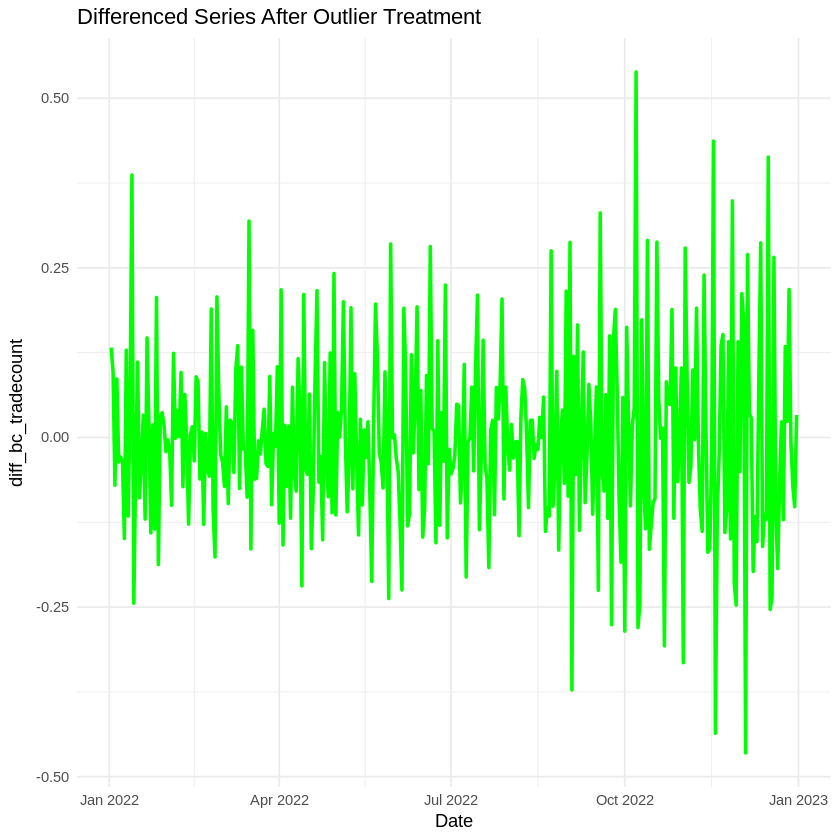

In [ ]:
# Identify potential outliers in the differenced series
z_scores <- abs(scale(train_data$diff_bc_tradecount))
potential_outliers <- which(z_scores > 3)

if(length(potential_outliers) > 0) {
  cat("Found", length(potential_outliers), "potential outliers\n")

  # Create outlier dummy variables
  outlier_matrix <- matrix(0, nrow = nrow(train_data), ncol = length(potential_outliers))
  colnames(outlier_matrix) <- paste0("outlier_", potential_outliers)

  for(i in 1:length(potential_outliers)) {
    outlier_matrix[potential_outliers[i], i] <- 1
  }

  ggplot(train_data, aes(x = Date, y = diff_bc_tradecount)) +
    geom_line(color = "green", size = 1) +
    ggtitle("Differenced Series After Outlier Treatment") +
    theme_minimal()
}

## Phase 2: Model Selection & Fitting:
This section implements a comprehensive model selection process for our time series data. After examining the ACF and PACF plots of the differenced series, we now proceed to systematically test multiple ARIMA models with varying parameters to identify the optimal specification.

The approach follows a rigorous statistical methodology where we:

- Test a wide range of potential ARIMA(p,d,q)(P,D,Q)[s] specifications based on insights from our autocorrelation analysis
- Consider various model enhancements including seasonal components and external regressors
- Evaluate each model using multiple criteria: information criteria (AIC/BIC)  and diagnostic tests on residuals

This step is critical because selecting the appropriate model specification directly impacts forecast accuracy. While the ACF and PACF plots provided initial guidance, this systematic comparison allows us to identify the model that best captures the underlying data generating process while avoiding overfitting.

By testing both simple and complex specifications, we can determine whether additional components like seasonal factors or dummy variables for days of the week meaningfully improve model performance.The comprehensive approach ensures we have empirical evidence to support our final model selection rather than relying solely on theoretical assumptions.

In [ ]:
# 7. Model selection - Try multiple models with different orders
models <- list()
model_metrics <- data.frame(
  model = character(),
  AIC = numeric(),
  BIC = numeric(),
  shapiro_p = numeric(),
  box_p = numeric(),
  stringsAsFactors = FALSE
)

# Define model orders to try
p_values <- c(1, 2, 3)
q_values <- c(1, 2, 3, 4)
P_values <- c(0, 1)
Q_values <- c(0, 1)

# Control for the number of models to try (for efficiency)
max_models <- 60
counter <- 1



In [ ]:
# Test different model specifications
for(p in p_values) {
  for(q in q_values) {
    for(P in P_values) {
      for(Q in Q_values) {
        if(counter > max_models) break

        model_name <- paste0("ARIMA(", p, ",0,", q, ")")
        cat("Fitting", model_name, "...\n")

        # Try with and without seasonality nor extra regressors
        # 1. Basic model - ARIMA
        tryCatch({
          models[[paste0(model_name, "_basic")]] <- Arima(
            train_data$diff_bc_tradecount,
            order = c(p, 0, q)
          )

          # Calculate model metrics
          residuals <- residuals(models[[paste0(model_name, "_basic")]])
          shapiro_p <- shapiro.test(residuals)$p.value
          box_p <- Box.test(residuals, lag = 14, type = "Ljung-Box")$p.value

          model_metrics <- rbind(model_metrics, data.frame(
            model = paste0(model_name, "_basic"),
            AIC = AIC(models[[paste0(model_name, "_basic")]]),
            BIC = BIC(models[[paste0(model_name, "_basic")]]),
            shapiro_p = shapiro_p,
            box_p = box_p
          ))
        }, error = function(e) {
          cat("Error fitting basic model:", e$message, "\n")
        })


        # 2. Model with outlier dummies - ARIMAX
        if(exists("outlier_matrix") && ncol(outlier_matrix) > 0) {
          tryCatch({
            models[[paste0(model_name, " _outliers")]] <- Arima(
              train_data$diff_bc_tradecount,
              order = c(p, 0, q),
              xreg = outlier_matrix
            )

            # Calculate model metrics
            residuals <- residuals(models[[paste0(model_name, " _outliers")]])
            shapiro_p <- shapiro.test(residuals)$p.value
            box_p <- Box.test(residuals, lag = 14, type = "Ljung-Box")$p.value

            model_metrics <- rbind(model_metrics, data.frame(
              model = paste0(model_name," _outliers"),
              AIC = AIC(models[[paste0(model_name, "_outliers")]]),
              BIC = BIC(models[[paste0(model_name, "_outliers")]]),
              shapiro_p = shapiro_p,
              box_p = box_p
            ))
          }, error = function(e) {
            cat("Error fitting outlier model:", e$message, "\n")
          })
        }


        # 3. Model with outlier dummies and Seasonality - SARIMAX
        if(exists("outlier_matrix") && ncol(outlier_matrix) > 0) {
          tryCatch({
            models[[paste0(model_name, "(", P, ",0,", Q, ")[7] _outliers")]] <- Arima(
              train_data$diff_bc_tradecount,
              order = c(p, 0, q),
              seasonal = list(order = c(P, 0, Q), period = 7),
              xreg = outlier_matrix
            )

            # Calculate model metrics
            residuals <- residuals(models[[paste0(model_name, "(", P, ",0,", Q, ")[7] _outliers")]])
            shapiro_p <- shapiro.test(residuals)$p.value
            box_p <- Box.test(residuals, lag = 14, type = "Ljung-Box")$p.value

            model_metrics <- rbind(model_metrics, data.frame(
              model = paste0(model_name,"(", P, ",0,", Q, ")[7] _outliers"),
              AIC = AIC(models[[paste0(model_name, "(", P, ",0,", Q, ")[7] _outliers")]]),
              BIC = BIC(models[[paste0(model_name, "(", P, ",0,", Q, ")[7] _outliers")]]),
              shapiro_p = shapiro_p,
              box_p = box_p
            ))
          }, error = function(e) {
            cat("Error fitting outlier seasonal model:", e$message, "\n")
          })
        }

        # 3. Model with seasonality
        else {
          tryCatch({
            models[[paste0(model_name, "(", P, ",0,", Q, ")[7]")]] <- Arima(
              train_data$diff_bc_tradecount,
              order = c(p, 0, q),
              seasonal = list(order = c(P, 0, Q), period = 7)
            )

            # Calculate model metrics
            residuals <- residuals(models[[paste0(model_name, "(", P, ",0,", Q, ")[7]")]])
            shapiro_p <- shapiro.test(residuals)$p.value
            box_p <- Box.test(residuals, lag = 14, type = "Ljung-Box")$p.value

            model_metrics <- rbind(model_metrics, data.frame(
              model = paste0(model_name, "(", P, ",0,", Q, ")[7]"),
              AIC = AIC(models[[paste0(model_name, "(", P, ",0,", Q, ")[7]")]]),
              BIC = BIC(models[[paste0(model_name, "(", P, ",0,", Q, ")[7]")]]),
              shapiro_p = shapiro_p,
              box_p = box_p
            ))
          }, error = function(e) {
            cat("Error fitting seasonal model:", e$message, "\n")
          })
        }

        counter <- counter + 1
      }
      if(counter > max_models) break
    }
    if(counter > max_models) break
  }
  if(counter > max_models) break
}



Fitting ARIMA(1,0,1) ...
Error fitting outlier model: no applicable method for 'logLik' applied to an object of class "NULL" 
Fitting ARIMA(1,0,1) ...
Error fitting outlier model: no applicable method for 'logLik' applied to an object of class "NULL" 
Fitting ARIMA(1,0,1) ...
Error fitting outlier model: no applicable method for 'logLik' applied to an object of class "NULL" 
Fitting ARIMA(1,0,1) ...
Error fitting outlier model: no applicable method for 'logLik' applied to an object of class "NULL" 
Fitting ARIMA(1,0,2) ...
Error fitting outlier model: no applicable method for 'logLik' applied to an object of class "NULL" 
Fitting ARIMA(1,0,2) ...
Error fitting outlier model: no applicable method for 'logLik' applied to an object of class "NULL" 
Fitting ARIMA(1,0,2) ...
Error fitting outlier model: no applicable method for 'logLik' applied to an object of class "NULL" 
Fitting ARIMA(1,0,2) ...
Error fitting outlier model: no applicable method for 'logLik' applied to an object of class 

Next, we will select the optimal one based on multiple statistical criteria. After fitting numerous ARIMA specifications with different parameter combinations in the previous step, we now need a systematic approach to identify the best performing model.

The models will be sorted by diagnostic criteria (residuals normality test) which helps prioritize models with normally distributed residuals – a key assumption for valid inference.

In [ ]:
# Find the best model based on residual diagnostics
model_metrics <- model_metrics %>%
  arrange(-shapiro_p)

# Print top 5 models
cat("\nTop 5 models by AIC:\n")
print(head(model_metrics, 5))

# Select the best model
best_model_name <- model_metrics$model[1]
best_model <- models[[best_model_name]]

cat("\nBest model:", best_model_name, "\n")


Top 5 models by AIC:
                             model       AIC       BIC shapiro_p     box_p
1 ARIMA(2,0,4)(1,0,1)[7] _outliers -521.4879 -463.0306 0.5058374 0.7457692
2 ARIMA(2,0,4)(1,0,0)[7] _outliers -514.2957 -459.7355 0.2810233 0.5990764
3 ARIMA(1,0,4)(1,0,1)[7] _outliers -517.7151 -463.1550 0.2068748 0.5523492
4 ARIMA(1,0,1)(1,0,1)[7] _outliers -521.4904 -478.6217 0.1866455 0.4321698
5 ARIMA(1,0,3)(1,0,0)[7] _outliers -509.5387 -462.7728 0.1609933 0.2804862

Best model: ARIMA(2,0,4)(1,0,1)[7] _outliers 


## Phase 3: Model Evaluation and Diagnosis
 After identifying the best-performing model from our candidate set, we conduct comprehensive diagnostic tests to verify that it satisfies all the necessary assumptions for reliable forecasting.This phase consists of two key components:

1. Quantitative Assessment: We report key statistical metrics for the optimal model:

 - Information criteria (AIC and BIC) that balance model fit with complexity
 - Normality testing via Shapiro-Wilk test to ensure residuals follow a normal distribution
 - Autocorrelation testing via Ljung-Box test to verify the model has captured all temporal patterns


2. Visual Diagnostics: We generate a series of diagnostic plots to visually inspect the model's performance:

 - Residual time series plot to check for remaining patterns or heteroscedasticity
 - ACF and PACF of residuals to confirm no significant autocorrelation remains
 - QQ-plot and histogram  to assess normality of residuals graphically


Best model: SARIMAX (2,1,4)(1,0,0) 
AIC: -521.4879 
BIC: -463.0306 
Shapiro-Wilk p-value: 0.5058374 
Ljung-Box p-value: 0.7457692 


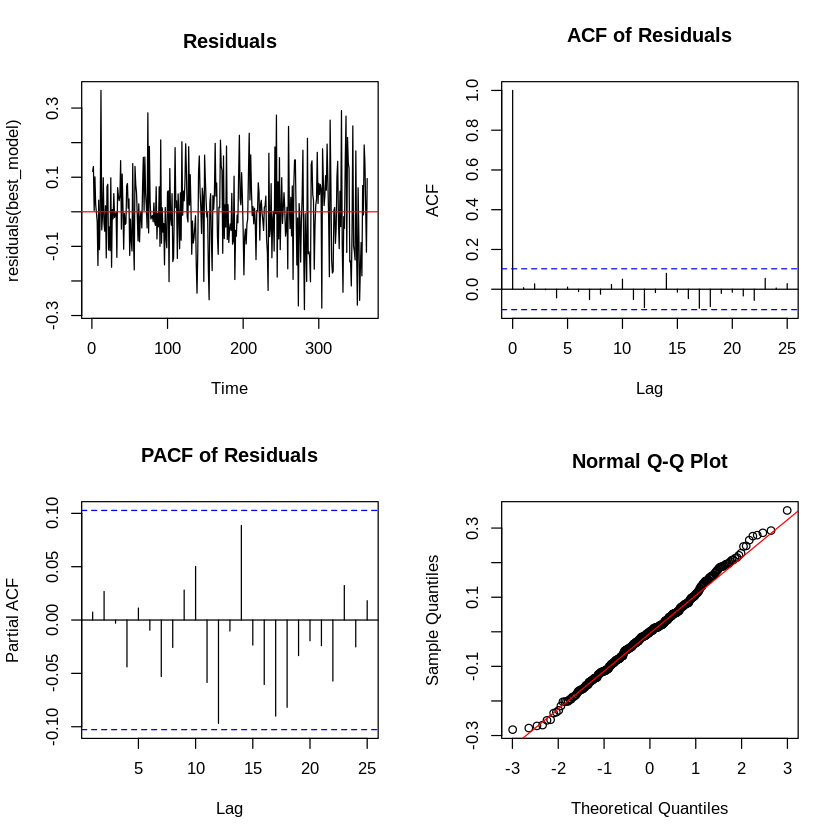

In [ ]:
# Evaluation metrics for selected model
cat("\nBest model: SARIMAX (2,1,4)(1,0,0) \n")
cat("AIC:", model_metrics$AIC[1], "\n")
cat("BIC:", model_metrics$BIC[1], "\n")
cat("Shapiro-Wilk p-value:", model_metrics$shapiro_p[1], "\n")
cat("Ljung-Box p-value:", model_metrics$box_p[1], "\n")

# Diagnostic plots for the best model
par(mfrow = c(2, 2))
plot(residuals(best_model), main = "Residuals")
abline(h = 0, col = "red")
acf(residuals(best_model), main = "ACF of Residuals")
pacf(residuals(best_model), main = "PACF of Residuals")
qqnorm(residuals(best_model))
qqline(residuals(best_model), col = "red")
par(mfrow = c(1, 1))



### Residual Diagnostics:
**Residuals Plot**: The residuals appear to fluctuate around zero without visible patterns, suggesting that the model captures the main structure of the data.

**ACF & PACF of Residuals**: Most autocorrelations are within the significance bounds, indicating no strong remaining autocorrelation in residuals. This suggests that the model adequately explains the time series' dependence.

**Normal Q-Q Plot**: The residuals closely follow the theoretical normal distribution, implying that the assumption of normally distributed residuals holds well.


**Shapiro-Wilk p-value (0.506)**: Indicates that residuals do not significantly deviate from normality.

**Ljung-Box p-value (0.746)**: Suggests no significant autocorrelation in residuals, supporting model adequacy.

Overall, these diagnostics confirm that the SARIMAX model is a good fit for the data.

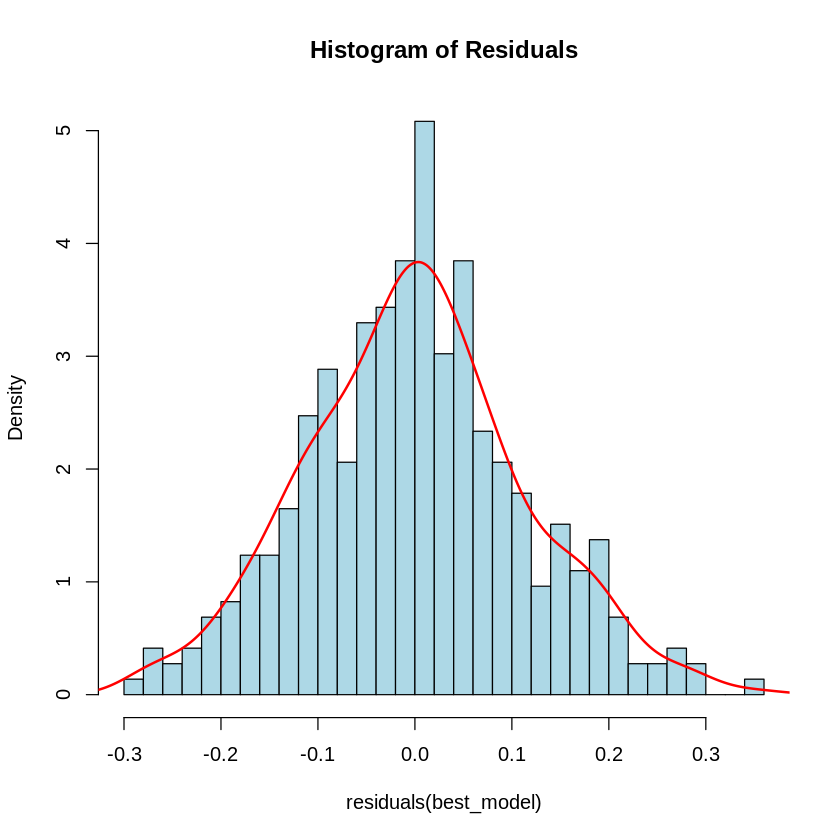

In [ ]:
# Histogram of residuals
hist(residuals(best_model), breaks = 30, probability = TRUE,
     col = "lightblue", main = "Histogram of Residuals")
lines(density(residuals(best_model)), col = "red", lwd = 2)


In [ ]:
# Final model summary
cat("\nFinal model summary:\n")
summary(best_model)


Final model summary:


Series: train_data$diff_bc_tradecount 
Regression with ARIMA(2,0,4)(1,0,1)[7] errors 

Coefficients:
          ar1      ar2     ma1     ma2      ma3      ma4    sar1     sma1
      -1.3592  -0.9912  0.9165  0.2398  -0.6737  -0.1808  0.9608  -0.9134
s.e.   0.0093   0.0076  0.0590  0.0847   0.0830   0.0586  0.0442   0.0655
      intercept  outlier_279  outlier_320  outlier_321  outlier_337
        -0.0020       0.3140       0.3297      -0.4557      -0.1847
s.e.     0.0042       0.1021       0.1129       0.1116       0.0978
      outlier_349
           0.0909
s.e.       0.1077

sigma^2 = 0.01317:  log likelihood = 275.74
AIC=-521.49   AICc=-520.11   BIC=-463.03

Training set error measures:
                        ME      RMSE        MAE MPE MAPE      MASE        ACF1
Training set -0.0001799297 0.1125465 0.08802419 Inf  Inf 0.5186118 0.007420229

## Phase 4: Forecasting
***
In this phase, we use the selected SARIMAX model to generate forecasts for the test period. The forecast is performed using external regressors, ensuring consistency with the model used during training. Any future outliers are set to zero to prevent unexpected distortions in predictions. The results are visualized on a transformed scale (Differenced Box-Cox) to maintain interpretability.

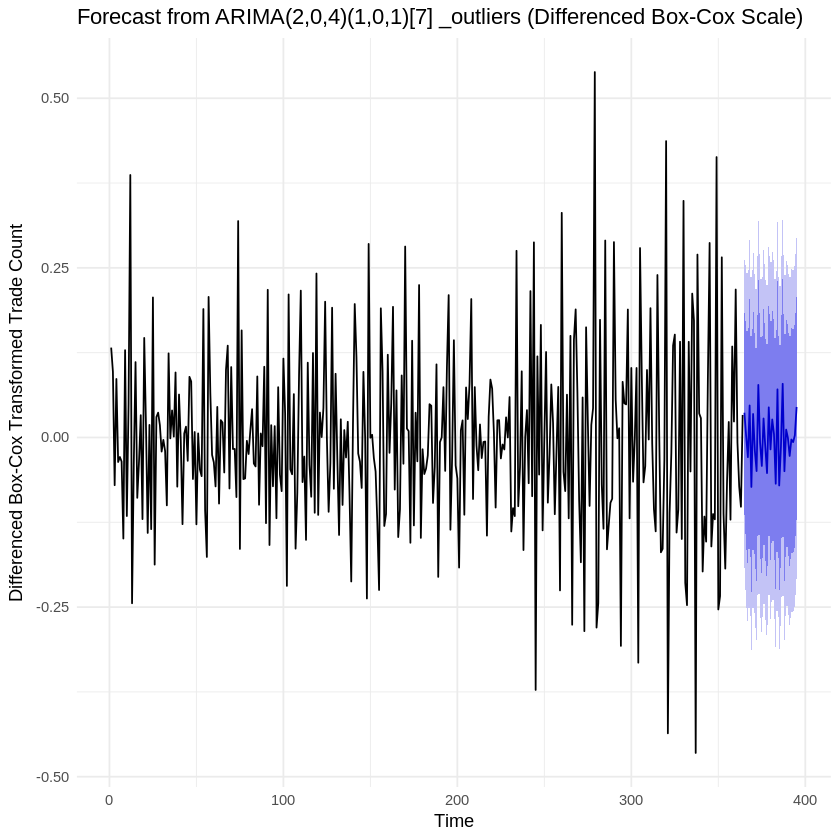

In [ ]:
# Forecast with selected model on the actual test period
# Length of the test period
forecast_horizon <- nrow(test_data)


# For outlier models, we set future outliers to 0
future_outlier_matrix <- matrix(0, nrow = forecast_horizon, ncol = ncol(outlier_matrix))
colnames(future_outlier_matrix) <- colnames(outlier_matrix)

# Forecast with external regressors
forecast_result <- forecast(best_model, h = forecast_horizon, xreg = future_outlier_matrix)


# Plot the forecast (differenced, transformed scale)
autoplot(forecast_result) +
  labs(title = paste("Forecast from", best_model_name, "(Differenced Box-Cox Scale)"),
       x = "Time", y = "Differenced Box-Cox Transformed Trade Count") +

  theme_minimal()



# Future Improvements
Here are some improvements that should be considered:
1. Additional Predictors: I would try to
incorporate:

    ○ Price data and market volatility
measures
    ○ Trading volumes from other
major exchanges

    ○ Sentiment analysis from
crypto-related social media
2. Alternative Modeling Approaches:
Several other techniques could
potentially improve forecasting:
    ○ Machine learning approaches
like Random Forests or
Gradient Boosting
    ○ Deep learning methods like
LSTMs that can capture
complex non-linear patterns
    ○ Hybrid models combining
statistical and machine learning
techniques

3. Forecast Combination: Averaging or
combining forecasts from multiple
models might produce more robust
predictions than relying on a single
"best" model.


# Conclusion
This project has been a challenging but
rewarding journey into time series analysis
and cryptocurrency market dynamics.Even in
highly volatile markets like crypto, there are
underlying patterns that can be identified and
modeled using appropriate statistical
techniques.

The analysis showed that Binance trading
activity follows predictable patterns,
particularly weekly seasonality, but is also
subject to extreme fluctuations that are
difficult to forecast.

The MAPE of approximately 12% represents
a useful level of accuracy for many practical
applications, such as capacity planning or
liquidity provision. However, the model's
inability to predict sudden market shifts
remains a fundamental limitation.

For future work, incorporating broader market
indicators, sentiment analysis, and alternative
modeling approaches could potentially push
beyond these limitations and further improve
our ability to anticipate cryptocurrency trading
activity.